In [1]:
pip install yfinance


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 10 , end.month , end.day)

In [4]:
stock = "RS"
reli_data = yf.download(stock , start , end)

[*********************100%***********************]  1 of 1 completed


In [5]:
reli_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-11-03,67.370003,67.559998,66.470001,66.589996,53.924618,737100
2014-11-04,66.370003,66.769997,65.190002,66.629997,53.957008,709000
2014-11-05,66.480003,66.989998,66.019997,66.470001,53.827461,762900
2014-11-06,66.010002,66.690002,65.889999,66.209999,53.900719,619400
2014-11-07,66.680000,67.449997,66.209999,66.930000,54.486870,692400


In [6]:
reli_data.shape

(2517, 6)

In [7]:
reli_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2517.000000,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,134.532153,136.081331,132.951379,134.537910,126.534757,4.724535e+05
std,77.248286,78.024327,76.457968,77.262760,79.821843,2.565178e+05
min,50.619999,52.099998,50.080002,51.750000,42.633747,6.720000e+04
25%,76.309998,76.889999,75.330002,76.209999,66.156006,3.142000e+05
50%,95.860001,96.379997,94.470001,95.430000,87.382591,4.223000e+05
75%,180.020004,183.449997,177.610001,180.259995,174.094666,5.615000e+05
max,342.079987,342.200012,335.359985,340.040009,337.488007,4.348300e+06


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'closing price of reliance data')

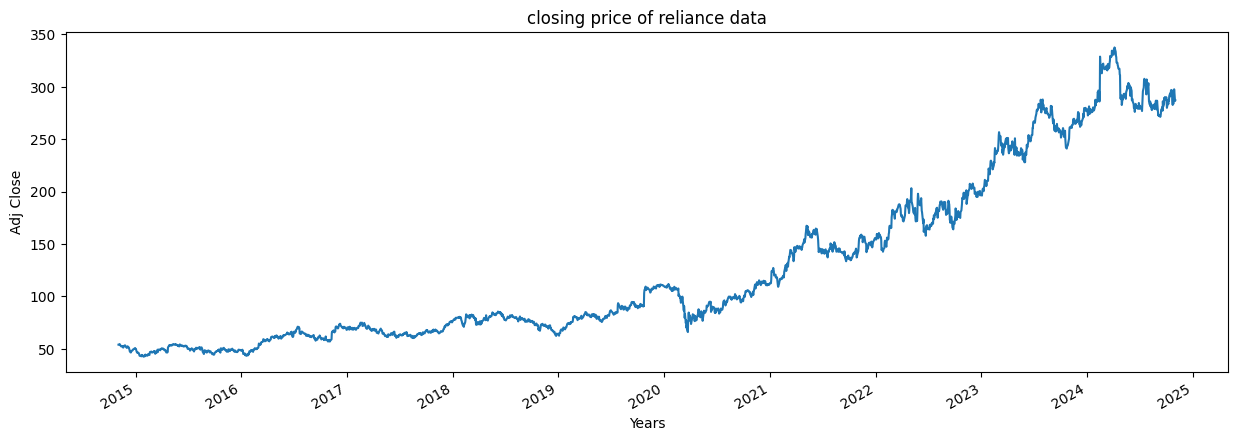

In [9]:
plt.figure(figsize=(15, 5))
reli_data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("closing price of reliance data")

In [10]:
def plot_graph(figsize, values, column_name):
    plt.figure(figsize=figsize)
    values.plot()
    plt.xlabel("Years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Reliance Data")
    plt.show()


In [11]:
reli_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

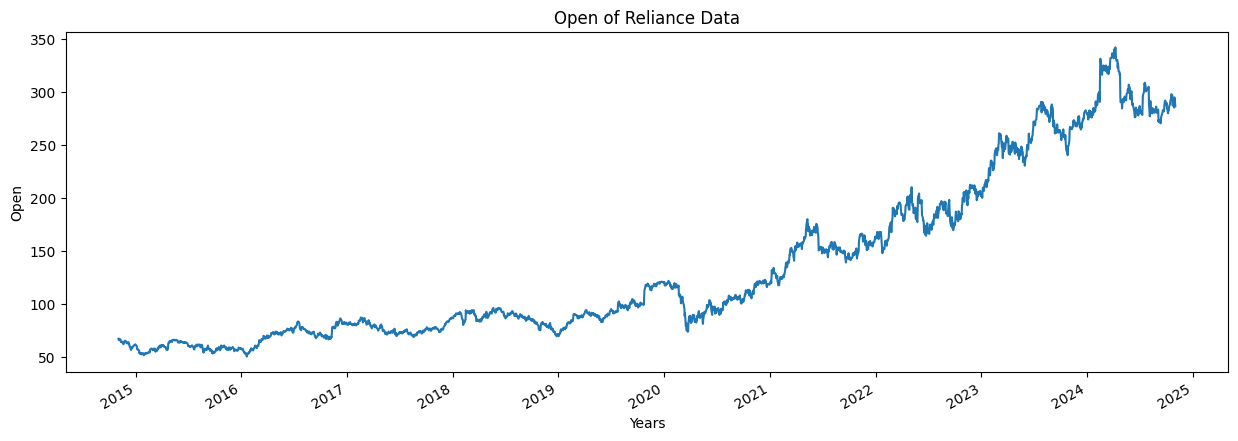

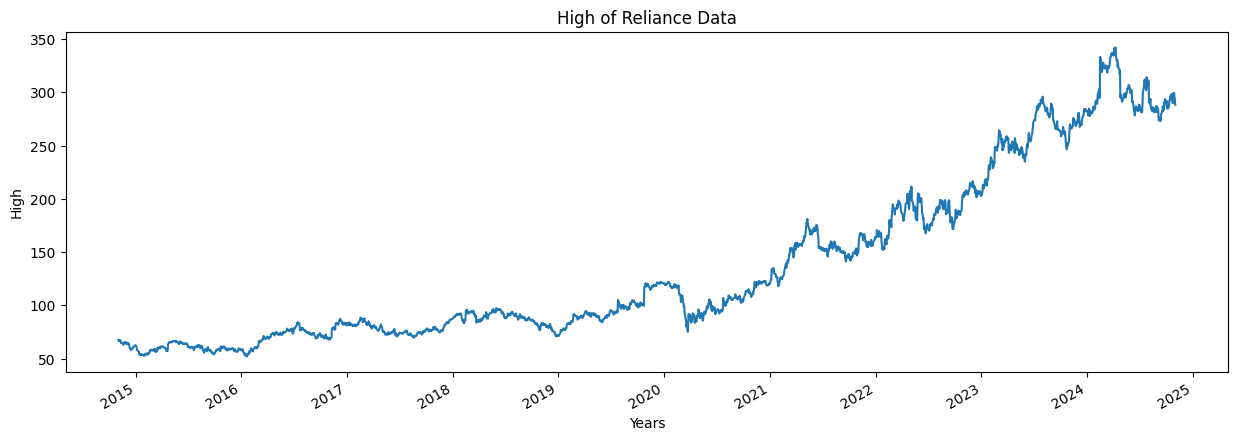

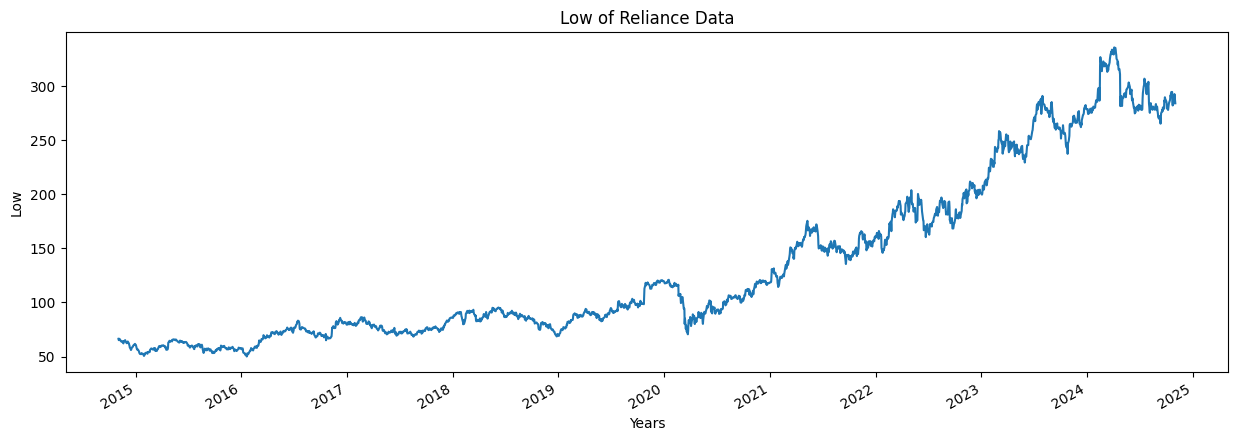

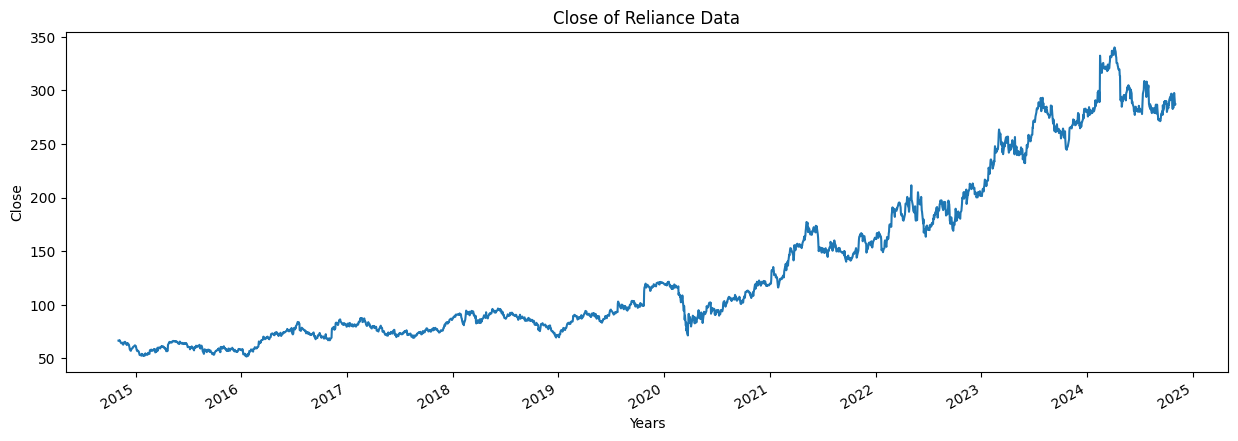

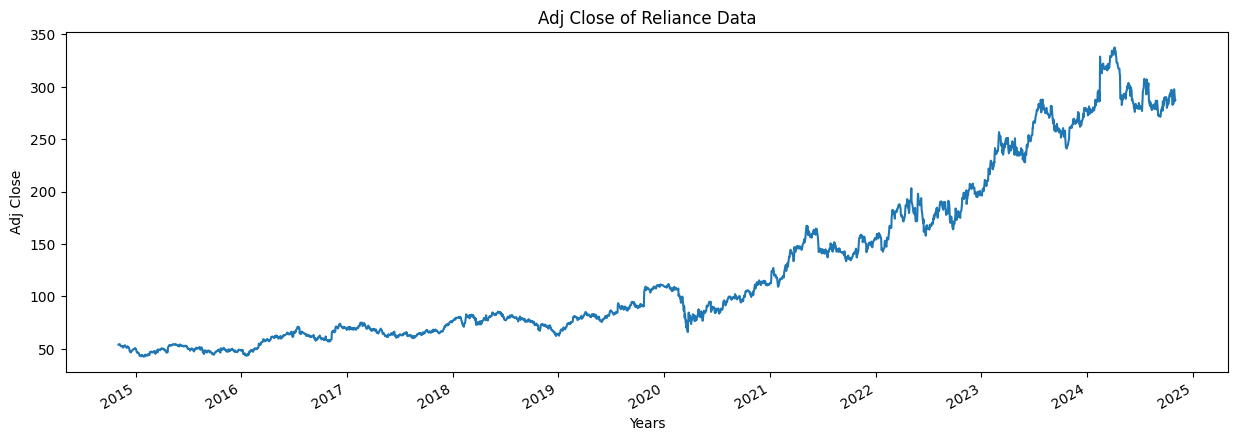

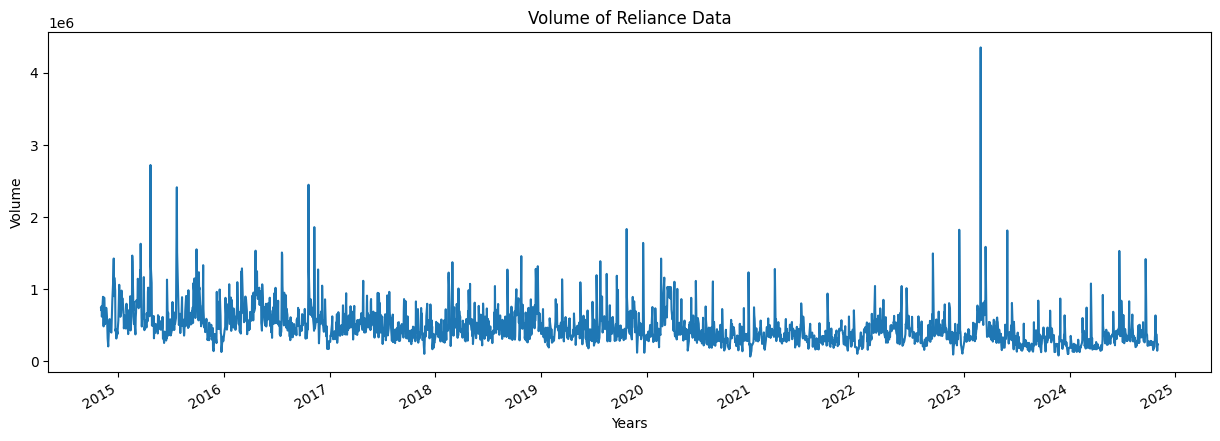

In [12]:
for column in reli_data.columns:
    plot_graph((15, 5), reli_data[column], column)

In [13]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [14]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [15]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [16]:
for i in range(2014 , 2025):
    print(i , list(reli_data.index.year).count(i))

2014 41
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 212


In [17]:
reli_data['MA_for_250_days'] = reli_data['Adj Close'].rolling(250).mean()

In [18]:
reli_data['MA_for_250_days'][0:250].tail()

Date
2015-10-23          NaN
2015-10-26          NaN
2015-10-27          NaN
2015-10-28          NaN
2015-10-29    49.143093
Name: MA_for_250_days, dtype: float64

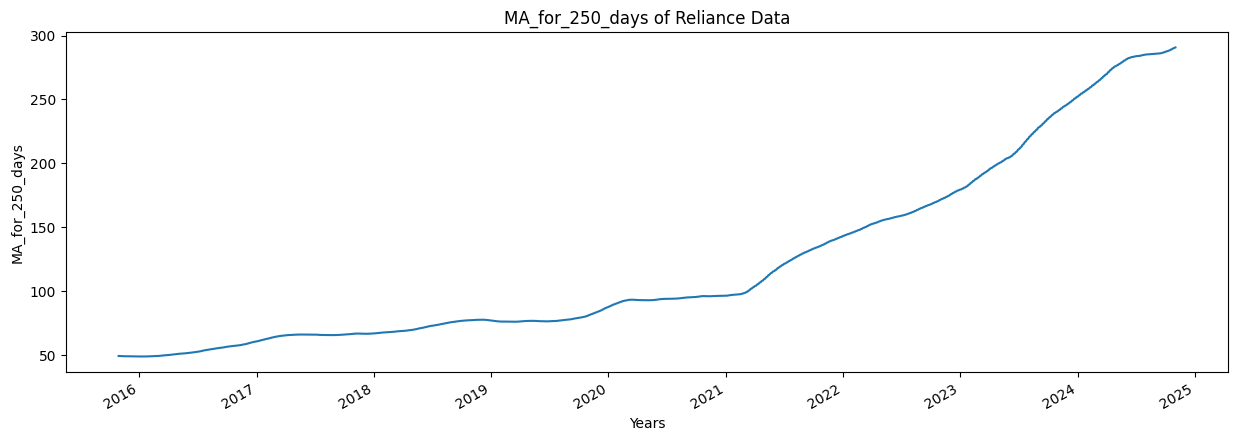

In [19]:
plot_graph((15,5), reli_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

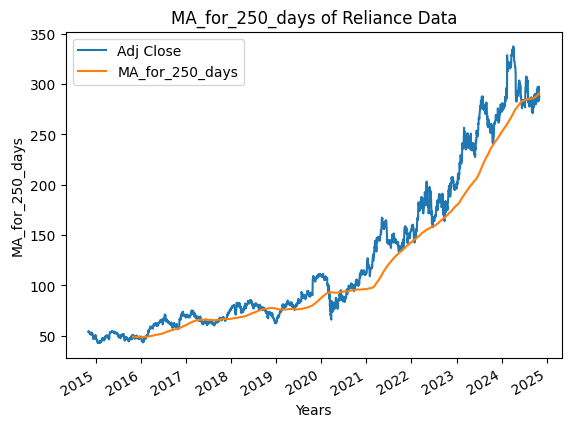

In [20]:
plot_graph((15,5), reli_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 1500x500 with 0 Axes>

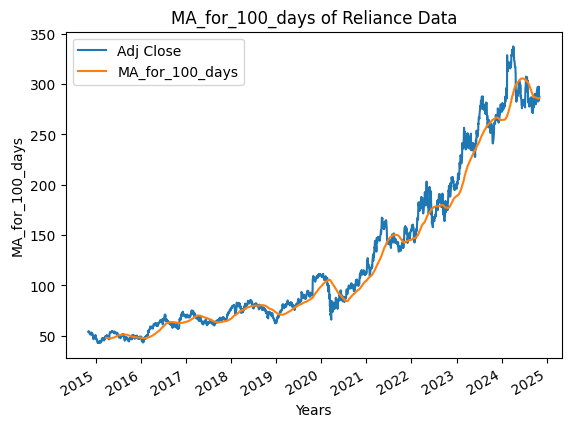

In [21]:
reli_data['MA_for_100_days'] = reli_data['Adj Close'].rolling(100).mean()
plot_graph((15,5), reli_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 1500x500 with 0 Axes>

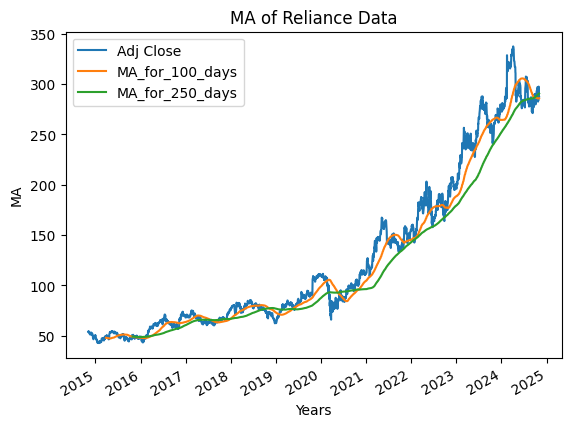

In [22]:
plot_graph((15,5), reli_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [23]:
reli_data['percentage_change'] = reli_data['Adj Close'].pct_change()

In [24]:
reli_data['percentage_change'].head()

Date
2014-11-03         NaN
2014-11-04    0.000601
2014-11-05   -0.002401
2014-11-06    0.001361
2014-11-07    0.010875
Name: percentage_change, dtype: float64

In [25]:
Adj_close_price = reli_data[['Adj Close']]
max(Adj_close_price.values) , min(Adj_close_price.values)

(array([337.48800659]), array([42.6337471]))

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler_data = scaler.fit_transform(Adj_close_price)
scaler_data

array([[0.03829306],
       [0.03840291],
       [0.03796355],
       ...,
       [0.83755361],
       [0.82653121],
       [0.82907484]])

In [27]:
len(scaler_data)

2517

In [28]:
X_data = []
y_data = []
for i in range(100 , len(scaler_data)):
    X_data.append(scaler_data[i - 100 :i])
    y_data.append(scaler_data[i])

import numpy as np
X_data  = np.array(X_data)
y_data = np.array(y_data)

In [29]:
X_data

array([[[0.03829306],
        [0.03840291],
        [0.03796355],
        ...,
        [0.02162799],
        [0.02148894],
        [0.02023748]],

       [[0.03840291],
        [0.03796355],
        [0.038212  ],
        ...,
        [0.02148894],
        [0.02023748],
        [0.02490954]],

       [[0.03796355],
        [0.038212  ],
        [0.04019994],
        ...,
        [0.02023748],
        [0.02490954],
        [0.02527107]],

       ...,

       [[0.82485771],
        [0.81678353],
        [0.80401343],
        ...,
        [0.81703504],
        [0.86451612],
        [0.85369721]],

       [[0.81678353],
        [0.80401343],
        [0.80448632],
        ...,
        [0.86451612],
        [0.85369721],
        [0.83755361]],

       [[0.80401343],
        [0.80448632],
        [0.7995539 ],
        ...,
        [0.85369721],
        [0.83755361],
        [0.82653121]]])

In [30]:
y_data

array([[0.02490954],
       [0.02527107],
       [0.02468704],
       ...,
       [0.83755361],
       [0.82653121],
       [0.82907484]])

In [31]:
int(len(X_data)*0.7)

1691

In [32]:
4908-100-int(len(X_data)*0.7)

3117

In [33]:
splitting_len = int(len(X_data)*0.7)
X_train = X_data[:splitting_len]
y_train = y_data[:splitting_len]

X_test = X_data[splitting_len:]
y_test = y_data[splitting_len:]

In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1691, 100, 1)
(1691, 1)
(726, 100, 1)
(726, 1)


In [35]:
pip install keras


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
pip show tensorflow keras

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: tensorflow-intel
Required-by: 
---
Name: keras
Version: 3.6.0
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: tensorflow_intel
Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from keras.models import Sequential  
from keras.layers import Dense, LSTM

In [43]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(64 , return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [45]:
model.compile(optimizer='adam', loss='mean_squared_error') #adam is algorithm

In [46]:
model.fit(X_train , y_train , batch_size = 1 , epochs = 2)

Epoch 1/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - loss: 9.6382e-04
Epoch 2/2
1691/1691 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - loss: 2.0846e-04


In [47]:
prediction = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


In [49]:
prediction

array([[0.40514034],
       [0.40400255],
       [0.40107027],
       [0.4015303 ],
       [0.4044106 ],
       [0.40013844],
       [0.3976532 ],
       [0.3992604 ],
       [0.40269467],
       [0.4085703 ],
       [0.41349238],
       [0.41795093],
       [0.4193278 ],
       [0.42015746],
       [0.41931385],
       [0.420987  ],
       [0.4266413 ],
       [0.43008125],
       [0.433047  ],
       [0.42987645],
       [0.4281552 ],
       [0.4316547 ],
       [0.43299368],
       [0.43429366],
       [0.43224737],
       [0.42973584],
       [0.42437816],
       [0.40822542],
       [0.3961336 ],
       [0.3884918 ],
       [0.38204795],
       [0.38023075],
       [0.38173395],
       [0.3853695 ],
       [0.39508328],
       [0.40510005],
       [0.41129905],
       [0.40965325],
       [0.4033976 ],
       [0.40350538],
       [0.41019958],
       [0.4138557 ],
       [0.41546756],
       [0.41706163],
       [0.42389703],
       [0.43174192],
       [0.44396842],
       [0.454

In [52]:
i_preds = scaler.inverse_transform(prediction)
i_preds

array([[162.0911 ],
       [161.75562],
       [160.89102],
       [161.02667],
       [161.87593],
       [160.61626],
       [159.88348],
       [160.35738],
       [161.36998],
       [163.10243],
       [164.55373],
       [165.86835],
       [166.27432],
       [166.51897],
       [166.27022],
       [166.76355],
       [168.43074],
       [169.44502],
       [170.31949],
       [169.38464],
       [168.87714],
       [169.90897],
       [170.30377],
       [170.68709],
       [170.08372],
       [169.34319],
       [167.76344],
       [163.00075],
       [159.43542],
       [157.1822 ],
       [155.28221],
       [154.7464 ],
       [155.18962],
       [156.2616 ],
       [159.12573],
       [162.07921],
       [163.90701],
       [163.42174],
       [161.57724],
       [161.60902],
       [163.58284],
       [164.66086],
       [165.13612],
       [165.60614],
       [167.62158],
       [169.9347 ],
       [173.53972],
       [176.71799],
       [178.5747 ],
       [178.6729 ],


In [53]:
y_pred = scaler.inverse_transform(y_test)
y_pred

array([[150.08622742],
       [148.60365295],
       [151.01402283],
       [152.31491089],
       [146.76713562],
       [148.66107178],
       [150.88969421],
       [151.76968384],
       [154.13226318],
       [154.35227966],
       [155.52880859],
       [154.44793701],
       [155.16531372],
       [154.26618958],
       [156.456604  ],
       [159.49829102],
       [158.29310608],
       [159.28788757],
       [155.3374939 ],
       [157.04005432],
       [160.42610168],
       [158.38874817],
       [159.09658813],
       [156.77223206],
       [156.58091736],
       [153.74009705],
       [144.28019714],
       [145.59062195],
       [144.93063354],
       [142.5776062 ],
       [144.05064392],
       [144.99758911],
       [146.23147583],
       [151.5688324 ],
       [153.08969116],
       [152.80273438],
       [149.34973145],
       [147.34106445],
       [152.09489441],
       [156.05484009],
       [153.87400818],
       [153.87400818],
       [154.81140137],
       [159

In [54]:
rmse = np.sqrt(np.mean((i_preds - y_pred)**2))
rmse

21.34273708697144

In [57]:
ploting_data = pd.DataFrame(
    {
        'orignal_test_data' :y_pred.reshape(-1),
        'predictions':i_preds.reshape(-1)
    },
    index = reli_data.index[splitting_len+100:]
)
ploting_data.head()

,orignal_test_data,predictions
Date,,
2021-12-14,150.086227,162.091095
2021-12-15,148.603653,161.755615
2021-12-16,151.014023,160.891022
2021-12-17,152.314911,161.026672
2021-12-20,146.767136,161.875931


<Figure size 1500x600 with 0 Axes>

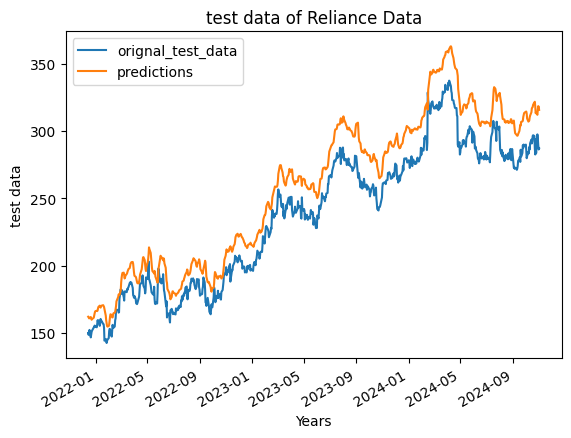

In [58]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 1500x600 with 0 Axes>

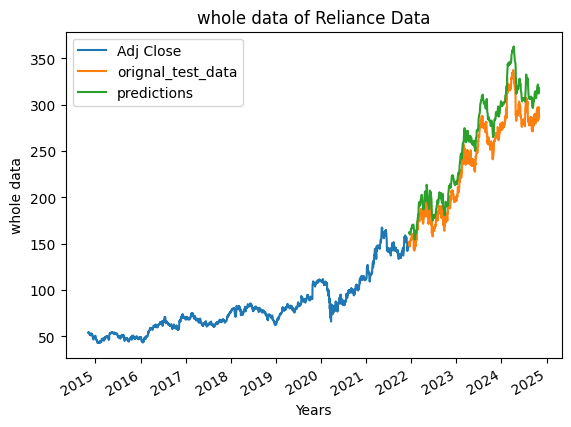

In [59]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [60]:
model.save("Latest_stock_price_model.keras")